In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import dc_stat_think as dcst

In [19]:
dates = pd.date_range(start='2021', periods=4, freq='Q')

data=range(1,5)

quarterly = pd.Series(data=data, index=dates)
print(quarterly)

monthly = pd.date_range(start='2021',
    periods=12,
    freq='M')

print(quarterly.reindex(monthly))

2021-03-31    1
2021-06-30    2
2021-09-30    3
2021-12-31    4
Freq: Q-DEC, dtype: int64
2021-01-31    NaN
2021-02-28    NaN
2021-03-31    1.0
2021-04-30    NaN
2021-05-31    NaN
2021-06-30    2.0
2021-07-31    NaN
2021-08-31    NaN
2021-09-30    3.0
2021-10-31    NaN
2021-11-30    NaN
2021-12-31    4.0
Freq: M, dtype: float64


In [15]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [38]:
data=[('uk' ,'2016-01-01',4.0),
('uk', '2016-01-08',  5.0),
('us', '2016-01-01', 1.0),
('us', '2016-01-08', 1.5)
]
df=pd.DataFrame(data,columns=['country','date','value'])
df['date']=pd.to_datetime(df['date'])
df=df.set_index(['country','date'])
print(df)

min_df_date=df.index.levels[1].min()
weekly_dates=pd.date_range(start='2015-01-02',end=min_df_date,freq='7d')
print(weekly_dates)

country=df.index.levels[0]
print(df.reindex(pd.MultiIndex.from_product([country,weekly_dates])))

                    value
country date             
uk      2016-01-01    4.0
        2016-01-08    5.0
us      2016-01-01    1.0
        2016-01-08    1.5
DatetimeIndex(['2015-01-02', '2015-01-09', '2015-01-16', '2015-01-23',
               '2015-01-30', '2015-02-06', '2015-02-13', '2015-02-20',
               '2015-02-27', '2015-03-06', '2015-03-13', '2015-03-20',
               '2015-03-27', '2015-04-03', '2015-04-10', '2015-04-17',
               '2015-04-24', '2015-05-01', '2015-05-08', '2015-05-15',
               '2015-05-22', '2015-05-29', '2015-06-05', '2015-06-12',
               '2015-06-19', '2015-06-26', '2015-07-03', '2015-07-10',
               '2015-07-17', '2015-07-24', '2015-07-31', '2015-08-07',
               '2015-08-14', '2015-08-21', '2015-08-28', '2015-09-04',
               '2015-09-11', '2015-09-18', '2015-09-25', '2015-10-02',
               '2015-10-09', '2015-10-16', '2015-10-23', '2015-10-30',
               '2015-11-06', '2015-11-13', '2015-11-20', '2015-

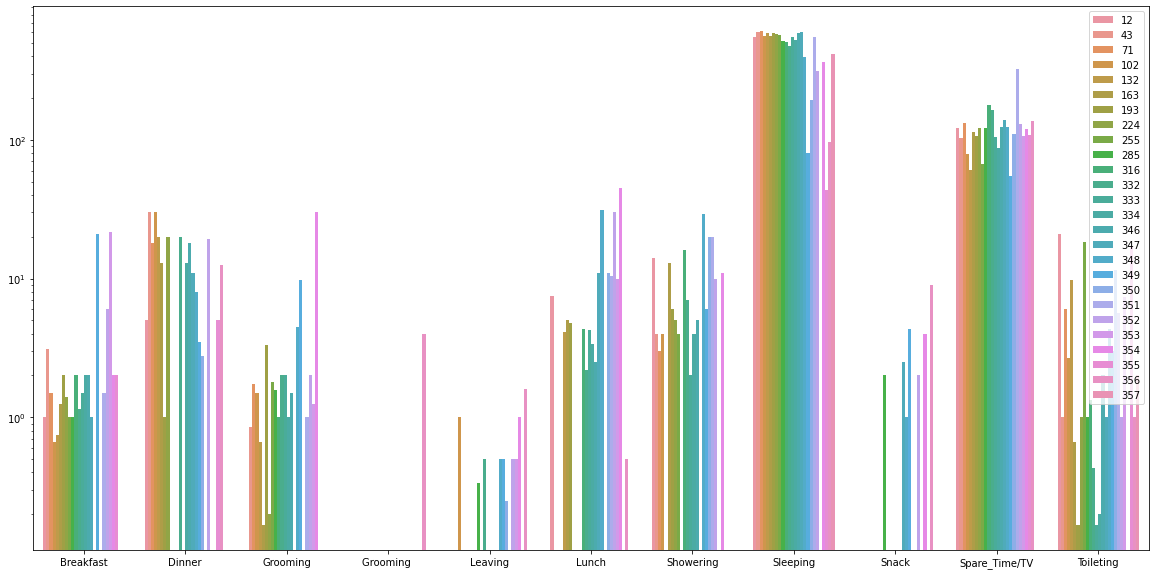

In [109]:
#df=pd.read_csv('https://raw.githubusercontent.com/Mrvrinder/AbnormalBehaviourDetection-/main/BobPatientDataCSV.csv')
#$df.to_csv('BobPatientDataCSV.csv')
#df=pd.read_csv('BobPatientDataCSV.csv',parse_dates=['Start time','End time'], index_col=['Start time','End time'])
df=pd.read_csv('BobPatientDataCSV.csv',parse_dates=['Start time'])
df.drop('End time',axis=1)
df=df.set_index('Start time')

#monthly=df.resample('M').mean()
#print(monthly)

grouped=df.groupby(['Activity',df.index.dayofyear])['Duration (Minutes)'].mean()
#print(grouped)

index=grouped.index.to_flat_index()
activities=[]
month=[]
for a,b in index:
    activities.append(a)
    month.append(b)

values=grouped.values

fig,ax =plt.subplots(figsize=(20,10))
sns.barplot(x=activities, y=values,hue=month,ax=ax)
plt.yscale("log")
plt.show()




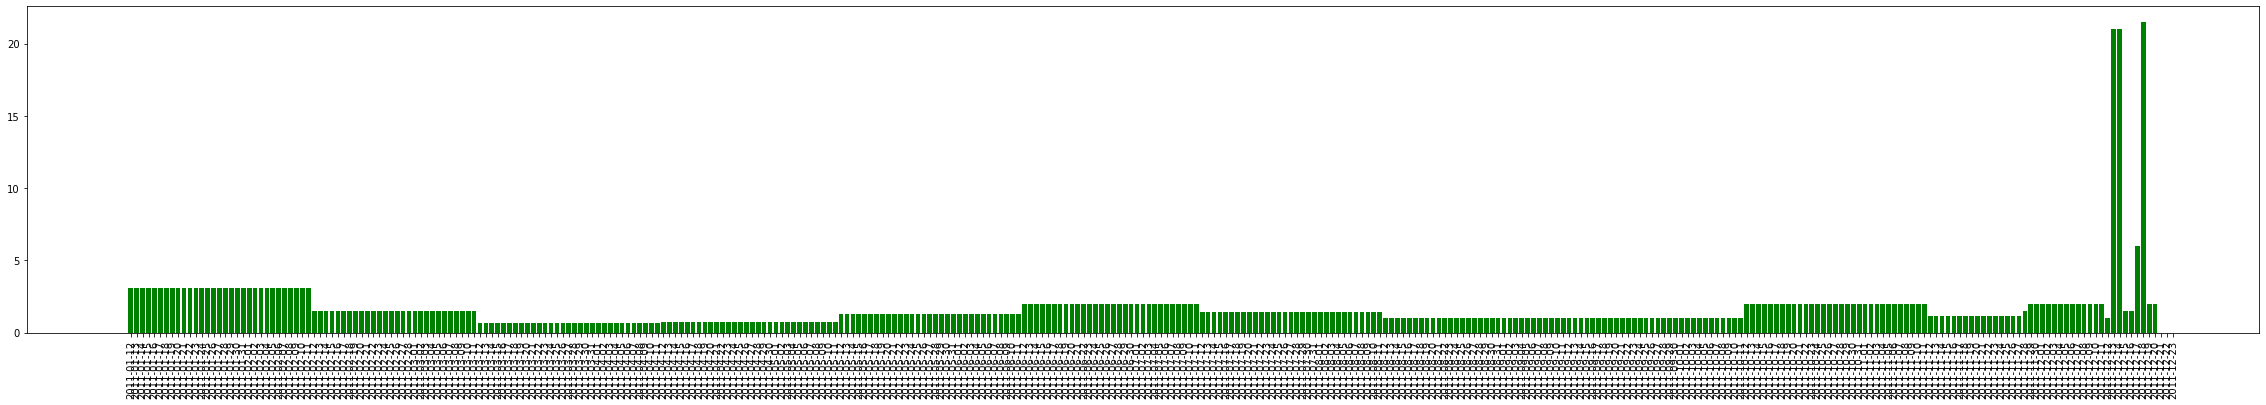

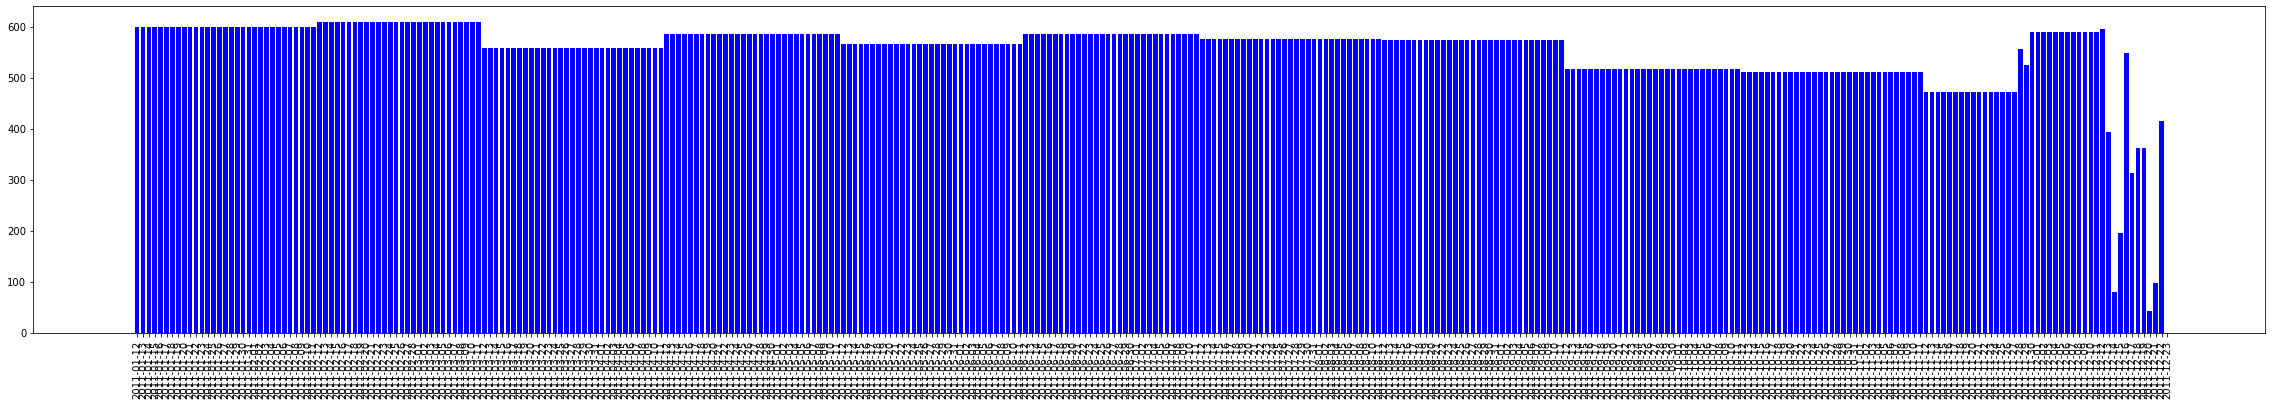

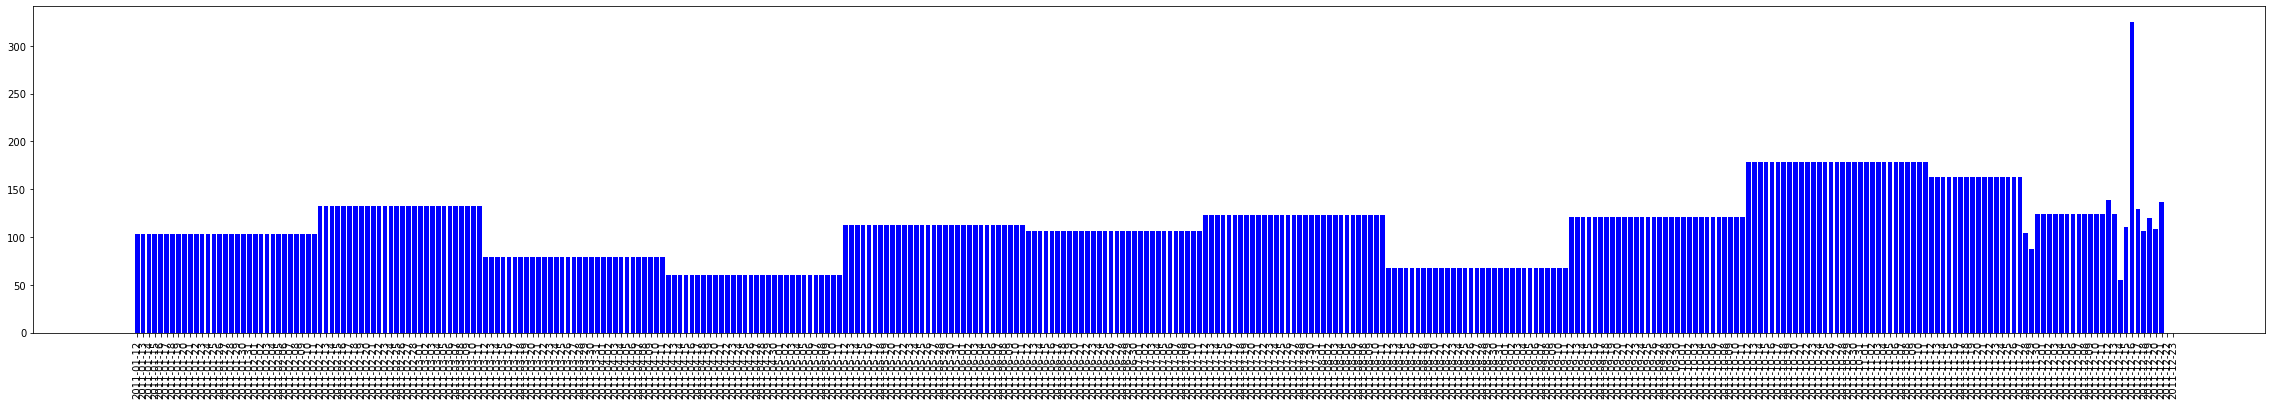

In [367]:
df=pd.read_csv('BobPatientDataCSV.csv',parse_dates=['Start time'])
df.drop('End time',axis=1)
df=df.set_index('Start time')

grouped=df.groupby(['Activity',df.index.dayofyear]).groups
#print(grouped)
summary_df=pd.DataFrame(columns=['Activity','DayOfYear','Duration (Minutes)','Date'])
for index, group in grouped.items():
    activity=index[0]
    dayofyear=index[1]
    filter=(df['Activity']==activity) & (df.index.dayofyear==dayofyear)
    #print(activity)
    duration=df[filter]['Duration (Minutes)'].mean()
    date=df[filter].index.date.max()
    summary_df.loc[len(summary_df)]=[activity,dayofyear,duration,date]
    
#

summary_df=summary_df.set_index('Date')

min_date=df.index.min()
max_date=df.index.max()

#print(min_date,max_date)

daily=pd.date_range(start=min_date,end=max_date,freq='D')
activity=['Breakfast','Sleeping']
filter=summary_df.Activity=='Breakfast'
breakfast=summary_df[filter]
breakfast=breakfast.reindex(daily, method='bfill')
#print(breakfast.index,breakfast.DayOfYear)

filter=summary_df.Activity=='Sleeping'
sleeping=summary_df[filter]
sleeping=sleeping.reindex(daily,method='bfill')
#print(sleeping.index,sleeping.DayOfYear)

filter=summary_df.Activity=='Spare_Time/TV'
spare_time=summary_df[filter]
spare_time=spare_time.reindex(daily,method='bfill')


plt.figure(figsize=(40,6))
plt.bar(daily,breakfast['Duration (Minutes)'],color='green')
plt.xticks(rotation=90)
plt.xticks(daily)
plt.show()
plt.figure(figsize=(40,6))
plt.bar(daily,sleeping['Duration (Minutes)'],color='blue')
plt.xticks(rotation=90)
plt.xticks(daily)
plt.show()
plt.figure(figsize=(40,6))
plt.bar(daily,spare_time['Duration (Minutes)'],color='blue')
plt.xticks(rotation=90)
plt.xticks(daily)
plt.show()

In [53]:
myval="01234566"

def walkTheTree(alist):
    queue=[]
    if(len(alist))==1: 
        return
    while len(alist):
        value=alist.pop(0)
        value_next=alist.pop(0)
        queue.append(value+value_next)
    print(queue)      
    walkTheTree(queue)
    #(mystring)
    #walkTheTree(mystring)

alist=[]
for char in myval:
    alist.append(int(char))
print(alist)

walkTheTree(alist)

[0, 1, 2, 3, 4, 5, 6, 6]
[1, 5, 9, 12]
[6, 21]
[27]


In [4]:
myDct={ "attrib1":{ "x":1, "y":2, "z":[{"p":100,"c":200},{"p":500,"c":600}] }, "attrib2":{"R":222,"K":320}, "attrib3":"hello" }
for key,value in myDct.items():
    print(key,value)

attrib1 {'x': 1, 'y': 2, 'z': [{'p': 100, 'c': 200}, {'p': 500, 'c': 600}]}
attrib2 {'R': 222, 'K': 320}
attrib3 hello


In [16]:
sdate = pd.to_datetime('2020-01-31') 
date_range = pd.date_range(start = sdate + pd.DateOffset(months=-3), 
                           end = sdate + pd.DateOffset(months=-1), freq = 'M')

df=pd.DataFrame({'date':pd.Series(date_range)})
print(df)

sdate=pd.Timestamp('2019-10-01')
index=pd.date_range(start=sdate,periods=3,freq='M')
print(index)

        date
0 2019-10-31
1 2019-11-30
2 2019-12-31
DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31'], dtype='datetime64[ns]', freq='M')


In [31]:
from datetime import timedelta
from datetime import date
import datetime as datetime
previous_day=pd.datetime.today().date()-datetime.timedelta(days=1)
start_datetime=datetime.datetime.strptime(str(previous_day)+' 10:00:00','%Y-%m-%d %H:%M:%S')
date_range = pd.date_range(start_datetime, freq='60min', periods=24)
print(date_range)

DatetimeIndex(['2021-03-25 10:00:00', '2021-03-25 11:00:00',
               '2021-03-25 12:00:00', '2021-03-25 13:00:00',
               '2021-03-25 14:00:00', '2021-03-25 15:00:00',
               '2021-03-25 16:00:00', '2021-03-25 17:00:00',
               '2021-03-25 18:00:00', '2021-03-25 19:00:00',
               '2021-03-25 20:00:00', '2021-03-25 21:00:00',
               '2021-03-25 22:00:00', '2021-03-25 23:00:00',
               '2021-03-26 00:00:00', '2021-03-26 01:00:00',
               '2021-03-26 02:00:00', '2021-03-26 03:00:00',
               '2021-03-26 04:00:00', '2021-03-26 05:00:00',
               '2021-03-26 06:00:00', '2021-03-26 07:00:00',
               '2021-03-26 08:00:00', '2021-03-26 09:00:00'],
              dtype='datetime64[ns]', freq='60T')


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [42]:
date_range=pd.date_range(start="2015-11-02", end="2015-12-14",freq="D")
date_range=[x for x in [x if x.dayofweek in [2,3] else None for x in date_range] if x]
print(date_range)

[Timestamp('2015-11-04 00:00:00', freq='D'), Timestamp('2015-11-05 00:00:00', freq='D'), Timestamp('2015-11-11 00:00:00', freq='D'), Timestamp('2015-11-12 00:00:00', freq='D'), Timestamp('2015-11-18 00:00:00', freq='D'), Timestamp('2015-11-19 00:00:00', freq='D'), Timestamp('2015-11-25 00:00:00', freq='D'), Timestamp('2015-11-26 00:00:00', freq='D'), Timestamp('2015-12-02 00:00:00', freq='D'), Timestamp('2015-12-03 00:00:00', freq='D'), Timestamp('2015-12-09 00:00:00', freq='D'), Timestamp('2015-12-10 00:00:00', freq='D')]


In [22]:
data=[('2014-02-24 16:16:47.204000',    1.391424)
,('2014-02-24 16:18:48.296000',    1.048143)
,('2014-02-24 16:19:52.346000',  -0.823974)
,('2014-02-24 16:22:13.665000',   -0.689560)
,('2014-02-24 16:24:13.760000',   -0.323252)
,('2014-02-24 16:26:15.155000',   -1.095331)
,('2014-02-24 16:29:58.235000',   -0.185681)]

df=pd.DataFrame(data,columns=['Date','Value'])
df['Date']=pd.to_datetime(df['Date'])
seconds=df.resample('1Min',on='Date').mean().dropna()

print(seconds)


                        Value
Date                         
2014-02-24 16:16:00  1.391424
2014-02-24 16:18:00  1.048143
2014-02-24 16:19:00 -0.823974
2014-02-24 16:22:00 -0.689560
2014-02-24 16:24:00 -0.323252
2014-02-24 16:26:00 -1.095331
2014-02-24 16:29:00 -0.185681


In [26]:
data=[10, 20, 30, 40, 50, 60, 70, 80, 90]
confidence=[5, 4]
np.percentile(data,confidence )

array([14. , 13.2])

[1. 2. 3. 4. 5. 6.]


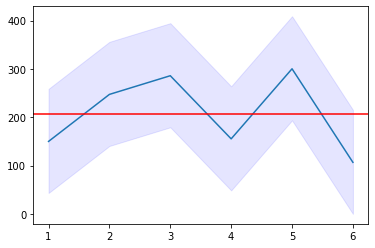

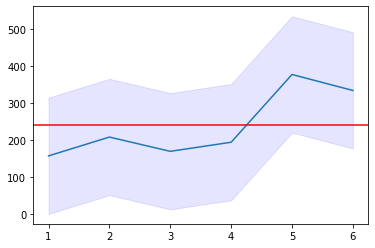

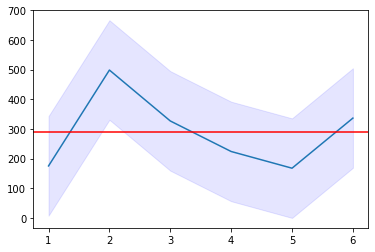

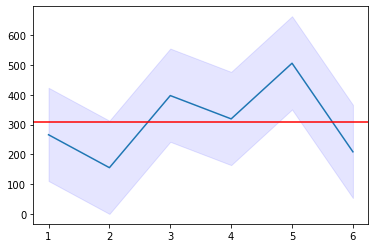

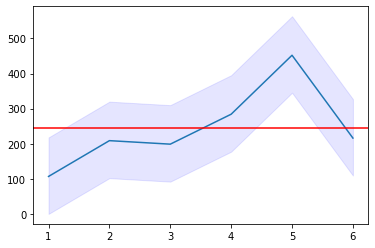

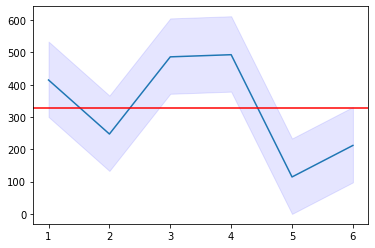

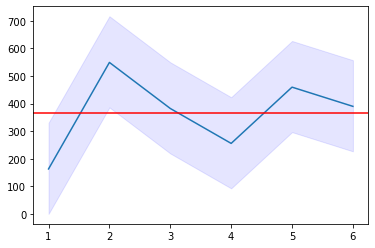

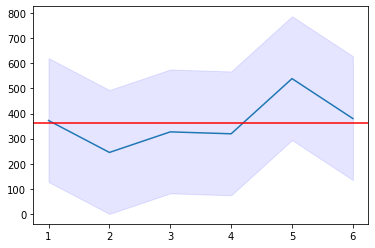

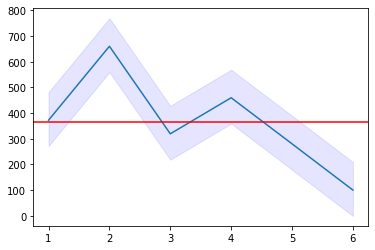

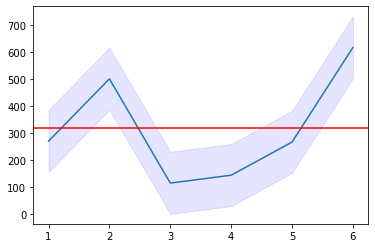

In [105]:
data = [154, 400, 1124, 82, 94, 108]
#print (np.percentile(data,[0.5,95])) # gives the 95th percentile

bs_data = dcst.draw_bs_reps(data, np.mean, size=6*10)

#print(np.reshape(bs_data,(24,6)))

x= np.linspace(1,6,6)
print(x)
for (item1,item2,item3,item4,item5,item6) in bs_data.reshape((10,6)):
    line_data=[item1,item2,item3,item4,item5,item6]
    ci=np.percentile(line_data,[.025,.975])
    mean_avg=np.mean(line_data)
    fig, ax = plt.subplots()
    ax.plot(x,line_data)
    ax.fill_between(x, (line_data-ci[0]), (line_data+ci[1]), color='b', alpha=.1)
    ax.axhline(mean_avg,color='red')
    plt.show()

In [97]:
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]
print (np.percentile(data,[5,95])) # gives the 95th percentile

[12.  28.3]


In [4]:
data = ({
'year' : ['2016','2016','2016','2016','2016','2015','2015','2015','2015','2014','2014','2014','2014'],        
    'Val' : ['A','B','D','T','S','D','T','T','U','T','T','V','C'],                 
    'Num' : [1,2,4,5,3,6,4,3,2,5,6,1,2],                                     
    })

df = pd.DataFrame(data = data)

grouped = df.groupby(['year','Val']).max()
print(grouped)
print(grouped.transform(pd.Series.sort_values,ascending=False))

          Num
year Val     
2014 C      2
     T      6
     V      1
2015 D      6
     T      4
     U      2
2016 A      1
     B      2
     D      4
     S      3
     T      5
          Num
year Val     
2015 D      6
2014 T      6
2016 T      5
     D      4
2015 T      4
2016 S      3
     B      2
2015 U      2
2014 C      2
2016 A      1
2014 V      1


In [7]:
data=[('2013-02-22 00:00:00+00:00',    0.280001)
,('2013-02-25 00:00:00+00:00',    0.109999)
,('2013-02-26 00:00:00+00:00',   -0.150000)
,('2013-02-27 00:00:00+00:00',    0.130001)
,('2013-02-28 00:00:00+00:00',    0.139999)]
df=pd.DataFrame(data=data,columns=['date','value'])
df['date']=pd.to_datetime(df['date'])

df['p_value']=df.value.shift(1)
df['pp_value']=df.value.shift(2)
df['ppp_value']=df.value.shift(3)
print(df)

                       date     value   p_value  pp_value  ppp_value
0 2013-02-22 00:00:00+00:00  0.280001       NaN       NaN        NaN
1 2013-02-25 00:00:00+00:00  0.109999  0.280001       NaN        NaN
2 2013-02-26 00:00:00+00:00 -0.150000  0.109999  0.280001        NaN
3 2013-02-27 00:00:00+00:00  0.130001 -0.150000  0.109999   0.280001
4 2013-02-28 00:00:00+00:00  0.139999  0.130001 -0.150000   0.109999
